In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
cantidad_tiradas = 5000
cantidad_corridas = 5
numero_elegido = 7

In [3]:
desviacion_estandar_esperada =  np.arange(0, 37, 1).std()
desviacion_estandar_esperada

10.677078252031311

In [4]:
varianza_esperada = np.arange(0, 37, 1).var()
varianza_esperada

114.0

In [5]:
esperanza_matematica_esperada = np.arange(0, 37, 1).mean()
esperanza_matematica_esperada

18.0

In [6]:
def graficar_frecuencia(frecuencia_relativa_listado, esPromedio):
    fig, ax = plt.subplots()

    ax.set_ylabel('fr (frecuencia relativa)')
    ax.set_xlabel('n (numero tiradas)')

    for frecuencia_relativa in frecuencia_relativa_listado:
        ax.plot([i for i in range(cantidad_tiradas)], frecuencia_relativa, linewidth=2.0, label='frn (frecuencia relativa del número X con respecto a n)')
    
    ax.axhline(y=1/37, color='r', linestyle='--', label='frecuencia relativa esperada')

    ax.legend()

    if esPromedio:
        ax.set_title(f"FRECUENCIA RELATIVA PROMEDIO {cantidad_corridas} CORRIDAS")
        plt.savefig(f"img/frecuencia-relativa-promedio-{cantidad_corridas}-corridas.png")
    else:
        ax.set_title(f"FRECUENCIA RELATIVA {cantidad_corridas} CORRIDAS")
        plt.savefig(f"img/frecuencia-relativa-{cantidad_corridas}-corridas.png")

    plt.show()

In [7]:
def graficar_varianza(varianza_listado, esPromedio):
    fig, ax = plt.subplots()

    ax.set_ylabel('vv (valor de la varianza)')
    ax.set_xlabel('n (numero tiradas)')

    for varianza in varianza_listado:
        ax.plot([i for i in range(cantidad_tiradas)], varianza, linewidth=2.0, )
    
    ax.axhline(y=varianza_esperada, color='r', linestyle='--', label='vve (valor de la varianza esperada)')

    ax.legend()

    if esPromedio:
        ax.set_title(f"VARIANZA PROMEDIO {cantidad_corridas} CORRIDAS")
        plt.savefig(f"img/varianza-promedio-{cantidad_corridas}-corridas.png")
    else:
        ax.set_title(f"VARIANZA {cantidad_corridas} CORRIDAS")
        plt.savefig(f"img/varianza-{cantidad_corridas}-corridas.png")

    plt.show()

In [8]:
def graficar_desvio(desviacion_estandar_listado, esPromedio):
    fig, ax = plt.subplots()
    print(cantidad_tiradas)
    print(len(desviacion_estandar_listado))
    ax.set_ylabel('vd (valor del desvio)')
    ax.set_xlabel('n (numero tiradas)')

    for desviacion_estandar in desviacion_estandar_listado:
        ax.plot([i for i in range(cantidad_tiradas)], desviacion_estandar, linewidth=2.0, )
    
    ax.axhline(y=desviacion_estandar_esperada, color='r', linestyle='--', label='vde (valor del desvio esperado)')

    ax.legend()

    if esPromedio:
        ax.set_title(f"DESVÍO ESTANDAR PROMEDIO {cantidad_corridas} CORRIDAS")
        plt.savefig(f"img/desviacion-estandar-esperada-promedio-{cantidad_corridas}-corridas.png")
    else:
        ax.set_title(f"DESVÍO ESTANDAR {cantidad_corridas} CORRIDAS")
        plt.savefig(f"img/desviacion-estandar-esperada-{cantidad_corridas}-corridas.png")

    plt.show()

In [9]:
def graficar_esperanza(esperanza_matematica_listado, esPromedio):
    fig, ax = plt.subplots()

    ax.set_ylabel('vp (valor promedio de las tiradas)')
    ax.set_xlabel('n (numero tiradas)')
    
    for esperanza_matematica in esperanza_matematica_listado:
        ax.plot([i for i in range(cantidad_tiradas)], esperanza_matematica, linewidth=2.0, label='vpn (valor promedio de las tiradas con respecto a n)')
    
    ax.axhline(y=esperanza_matematica_esperada, color='r', linestyle='--', label='vpe (valor promedio esperado)')

    ax.legend()

    if esPromedio:
        ax.set_title(f"ESPERANZA MATEMATICA PROMEDIO {cantidad_corridas} CORRIDAS")
        plt.savefig(f"img/esperanza-matematica-promedio-{cantidad_corridas}-corridas.png")
    else:
        ax.set_title(f"ESPERANZA MATEMATICA {cantidad_corridas} CORRIDAS")
        plt.savefig(f"img/esperanza-matematica-{cantidad_corridas}-corridas.png")

    plt.show()

In [10]:
def graficar_histograma(frecuencias_listado, esPromedio):
    fig, ax = plt.subplots()

    ax.set_xlabel('n')
    ax.set_ylabel('fr (frecuencia relativa)')

    for df_frecuencias in frecuencias_listado:
        ax.bar(df_frecuencias['valor'], df_frecuencias['fr%'], alpha=0.5)

    ax.axhline((1/37)*100, color='r', linestyle='--', label='fre (frecuencia relativa esperada)')

    ax.legend()

    if esPromedio:
        ax.set_title(f"HISTOGRAMA PROMEDIO {cantidad_corridas} CORRIDAS")
        plt.savefig(f"img/histograma-frecuencia-relativa-promedio{cantidad_corridas}-corridas.png")
    else:
        ax.set_title(f"HISTOGRAMA {cantidad_corridas} CORRIDAS")
        plt.savefig(f"img/histograma-frecuencia-relativa-{cantidad_corridas}-corridas.png")

    plt.show()

In [11]:

def generar_dataframe_frecuencias(df_tiradas):
    frecuencia_absoluta = pd.Series(df_tiradas["valor"]).value_counts()

    df_frecuencias = pd.DataFrame()
    df_frecuencias['valor'] = frecuencia_absoluta.index
    df_frecuencias['fa'] = frecuencia_absoluta.values
    df_frecuencias['fr'] = df_frecuencias['fa']/len(df_tiradas)
    df_frecuencias['fr%'] = 100*df_frecuencias['fr']

    return df_frecuencias

In [12]:
def generar_estadisticas(numero_elegido):
    frecuencia_absoluta = []
    frecuencia_relativa = []
    esperanza_matematica = []
    desviacion_estandar = []
    varianza = []

    cantidad_ocurrencias = 0

    for index, tirada in enumerate(tiradas):
        if tirada == numero_elegido:
            cantidad_ocurrencias += 1
            frecuencia_absoluta.append(cantidad_ocurrencias)
        
        frecuencia_relativa.append(cantidad_ocurrencias/(index+1))
        esperanza_matematica.append(np.mean(tiradas[:index+1]))
        desviacion_estandar.append(np.std(tiradas[:index+1]))
        varianza.append(np.var(tiradas[:index+1]))
    
    return frecuencia_relativa, esperanza_matematica, desviacion_estandar, varianza

In [13]:
frecuencia_histograma_total = []
frecuencia_relativa_total = []
esperanza_matematica_total = []
desviacion_estandar_total = []
varianza_total = []

frecuencia_histograma_promedio = []
frecuencia_relativa_promedio = []
esperanza_matematica_promedio = []
desviacion_estandar_promedio = []
varianza_promedio = []

for corrida in range(cantidad_corridas):

    tiradas = np.random.randint(0,37,size=[cantidad_tiradas])
    df_tiradas = pd.DataFrame(data=tiradas, columns=["valor"])

    df_frecuencias = generar_dataframe_frecuencias(df_tiradas) # esto es para el histograma

    frecuencia_relativa, esperanza_matematica, desviacion_estandar, varianza = generar_estadisticas(numero_elegido)

    frecuencia_histograma_total.append(df_frecuencias)
    frecuencia_relativa_total.append(frecuencia_relativa)
    esperanza_matematica_total.append(esperanza_matematica)
    desviacion_estandar_total.append(desviacion_estandar)
    varianza_total.append(varianza)
    


frecuencia_relativa_promedio.append([sum(sublista[i] for sublista in frecuencia_relativa_total) / cantidad_corridas for i in range(cantidad_tiradas)])
esperanza_matematica_promedio.append([sum(sublista[i] for sublista in esperanza_matematica_total) / cantidad_corridas for i in range(cantidad_tiradas)])
desviacion_estandar_promedio.append([sum(sublista[i] for sublista in desviacion_estandar_total) / cantidad_corridas for i in range(cantidad_tiradas)])
varianza_promedio.append([sum(sublista[i] for sublista in varianza_total) / cantidad_corridas for i in range(cantidad_tiradas)])



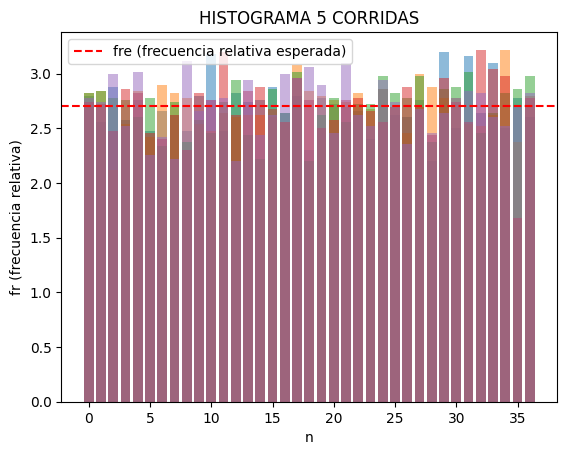

In [64]:
graficar_histograma(frecuencia_histograma_total, False)

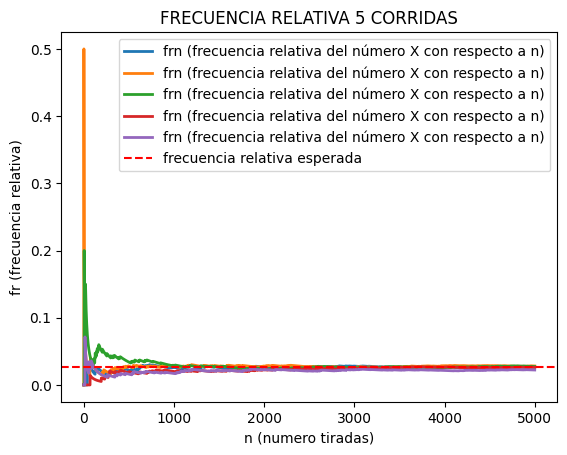

In [65]:
graficar_frecuencia(frecuencia_relativa_total, False)

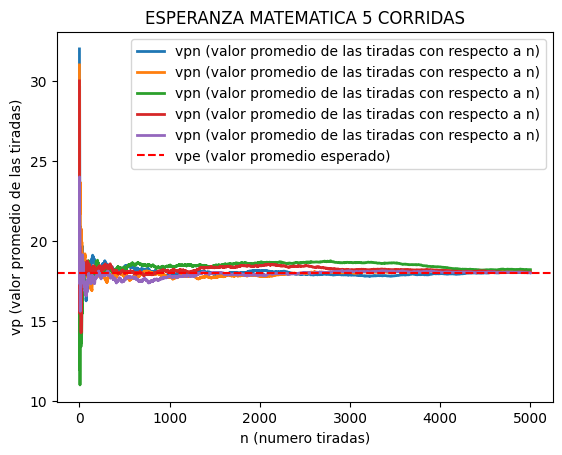

In [66]:
graficar_esperanza(esperanza_matematica_total, False)

5000
5


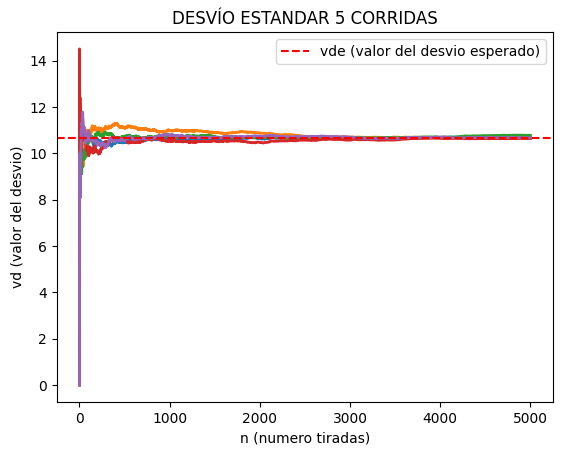

In [67]:
graficar_desvio(desviacion_estandar_total, False)

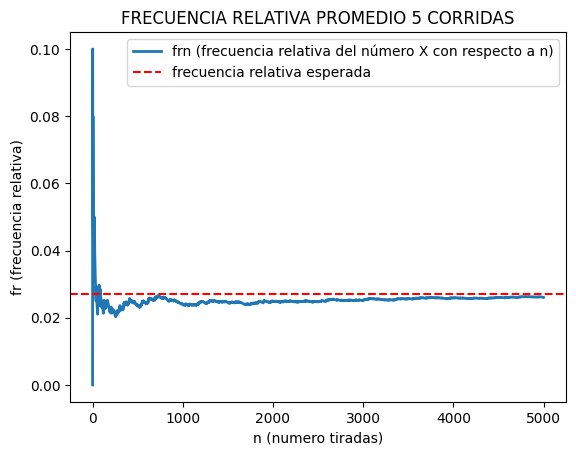

In [68]:
graficar_frecuencia(list(frecuencia_relativa_promedio), True)

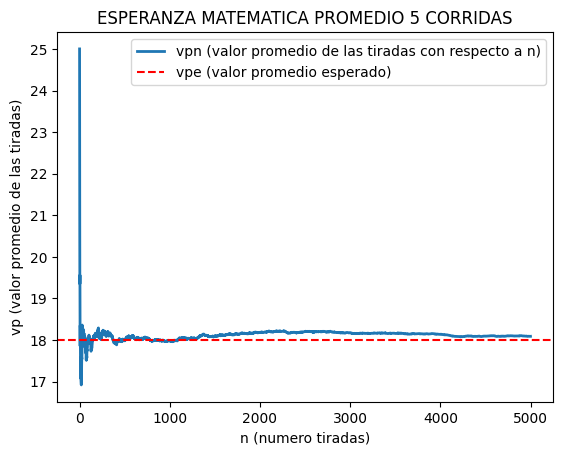

In [69]:
graficar_esperanza(list(esperanza_matematica_promedio), True)

5000
1


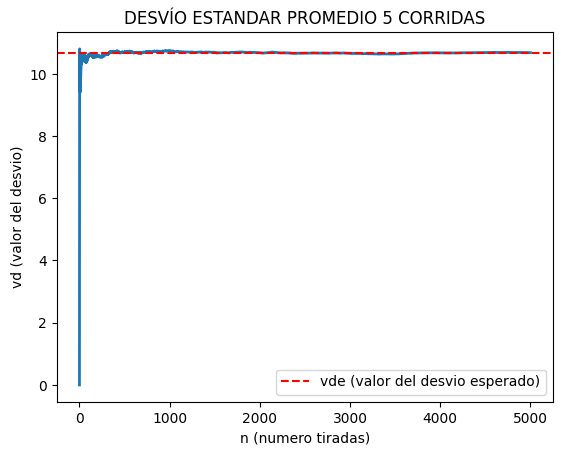

In [70]:
graficar_desvio(list(desviacion_estandar_promedio), True)